<a href="https://colab.research.google.com/github/gabrielasenareis/Portfolio/blob/main/An%C3%A1lise_de_vendas_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns

In [ ]:
import os
caminho_arquivo = "/content/ecommerce_sales_analysis.csv"
df = pd.read_csv(caminho_arquivo)
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [ ]:
df.tail()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394
999,1000,Product_1000,Toys,225.77,2.1,114,890,903,983,769,134,704,648,400,495,839,611,110


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [ ]:
df.shape

(1000, 18)

In [ ]:
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['category'].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [ ]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [ ]:
df.drop('product_name', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   category        1000 non-null   object 
 2   price           1000 non-null   float64
 3   review_score    1000 non-null   float64
 4   review_count    1000 non-null   int64  
 5   sales_month_1   1000 non-null   int64  
 6   sales_month_2   1000 non-null   int64  
 7   sales_month_3   1000 non-null   int64  
 8   sales_month_4   1000 non-null   int64  
 9   sales_month_5   1000 non-null   int64  
 10  sales_month_6   1000 non-null   int64  
 11  sales_month_7   1000 non-null   int64  
 12  sales_month_8   1000 non-null   int64  
 13  sales_month_9   1000 non-null   int64  
 14  sales_month_10  1000 non-null   int64  
 15  sales_month_11  1000 non-null   int64  
 16  sales_month_12  1000 non-null   int64  
dtypes: float64(2), int64(14), object(1

In [133]:


df.rename(columns={'sales_month_1': 'janeiro', 'sales_month_2': 'fevereiro', 'sales_month_3': 'março', 'sales_month_4': 'abril', 'sales_month_5': 'maio', 'sales_month_6': 'junho','sales_month_7': 'julho', 'sales_month_8': 'agosto', 'sales_month_9': 'setembro', 'outbro': 'sales_month_10', 'sales_month_11': 'novembro', 'sales_month_12': 'dezembro'}, inplace=True)
df.head()

,product_id,category,price,review_score,review_count,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro,total_sales
0,1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


In [135]:
df['total_sales'].sum()

6019912

# AVALIANDO VENDAS DE ACORDO COM A CATEGORIA

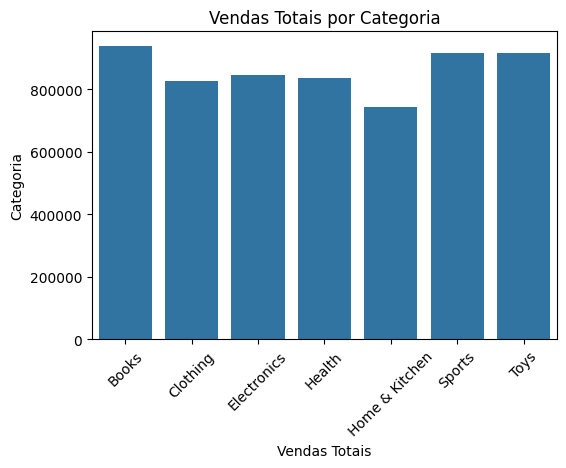

In [151]:

df['total_sales'] = df.loc[:, 'janeiro':'dezembro'].sum(axis=1)
category_sales_total = df.groupby('category')['total_sales'].sum()
plt.figure(figsize=(6, 4))
sns.barplot(category_sales_total)
plt.title('Vendas Totais por Categoria')
plt.xlabel('Vendas Totais')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.show()

# vendas mensais por categoria

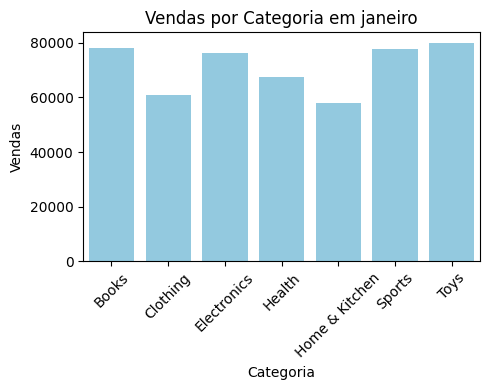

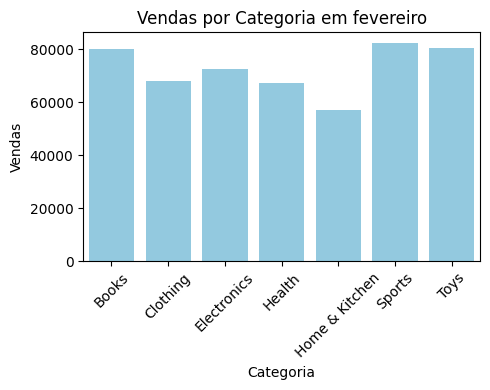

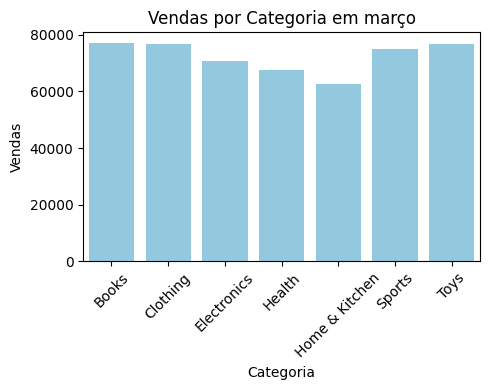

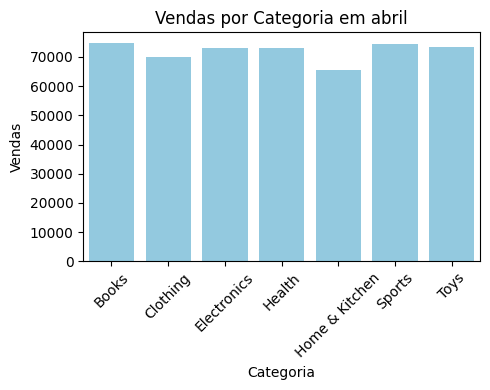

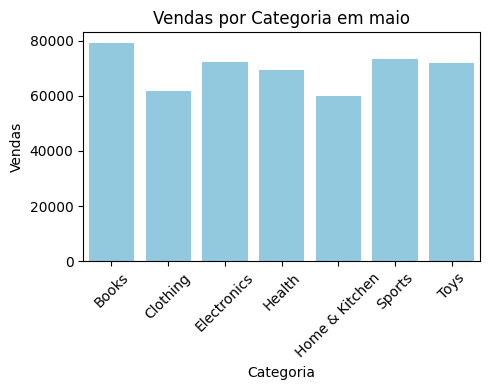

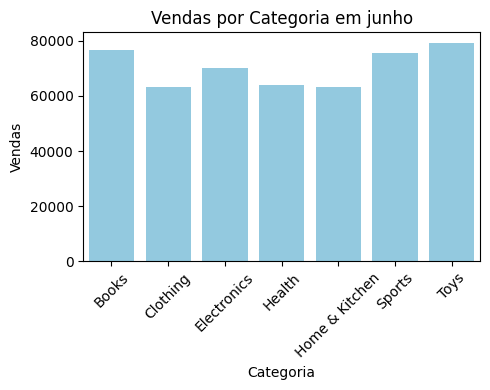

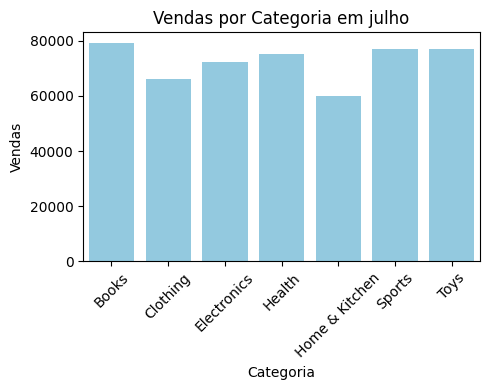

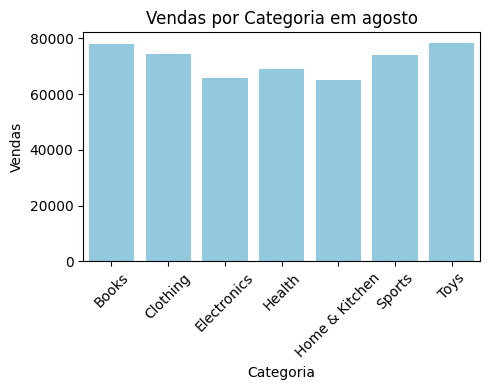

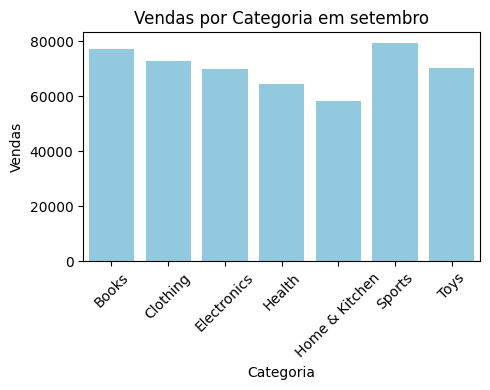

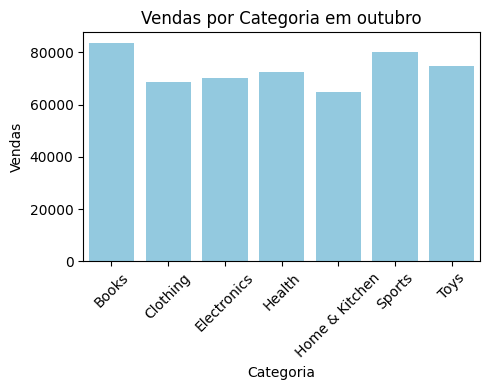

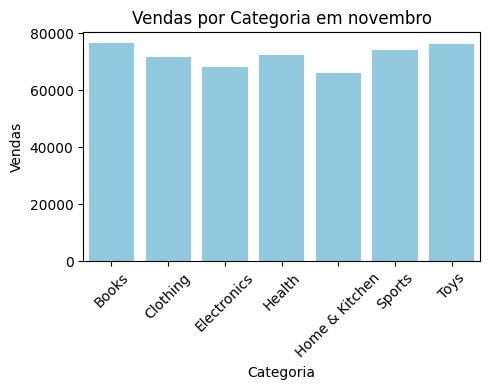

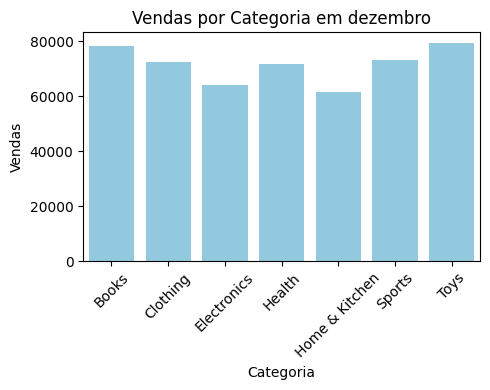

In [147]:
meses = df[['janeiro', 'fevereiro', 'março','abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']]

for mes in meses:
  category_sales = df.groupby('category')[mes].sum()
  titulo = f'Vendas por Categoria em {mes}'

  plt.figure(figsize=(5, 4))
  sns.barplot(category_sales, color='skyblue')
  plt.xlabel('Categoria')
  plt.ylabel('Vendas')
  plt.title(titulo)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()




# avaliações sazonais

# avaliando vendas por período

In [152]:
somas_mensais

janeiro      498306
fevereiro    507661
março        506739
abril        503823
maio         487194
junho        491653
julho        507011
agosto       504569
setembro     491934
outubro      514798
novembro     505838
dezembro     500386
dtype: int64

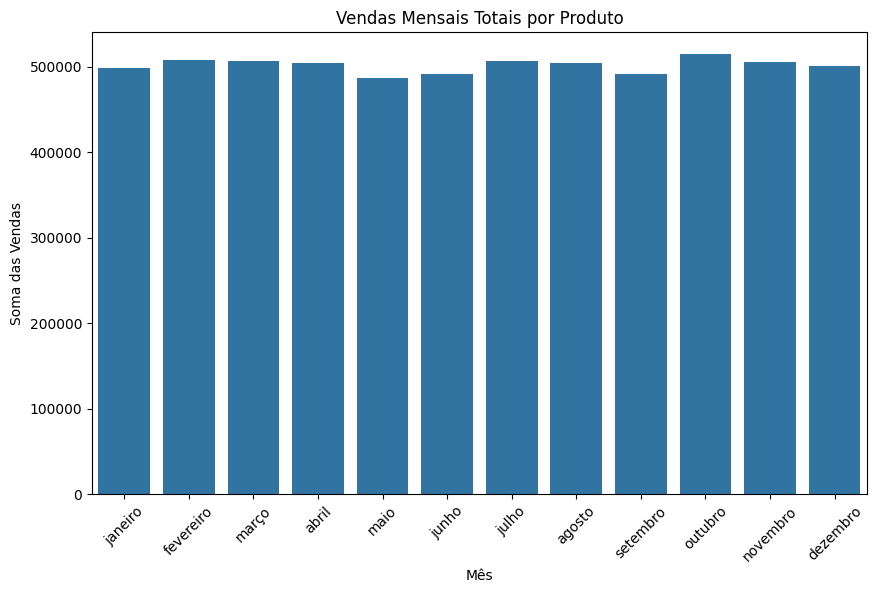

In [154]:
somas_mensais = meses.sum(axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(somas_mensais)
plt.xlabel('Mês')
plt.ylabel('Soma das Vendas')
plt.title('Vendas Mensais Totais por Produto')
plt.xticks(rotation=45)
plt.show()


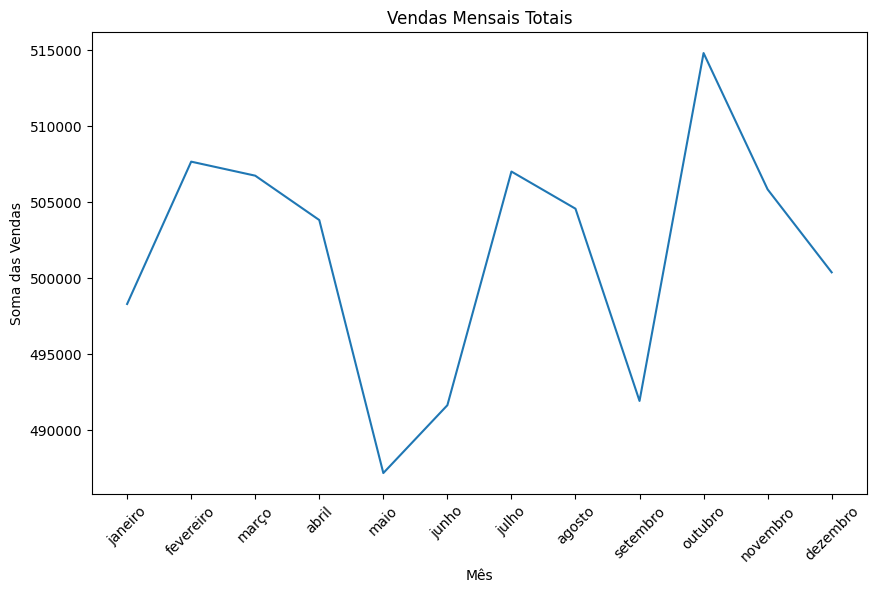

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(somas_mensais.index, somas_mensais.values)
plt.xlabel('Mês')
plt.ylabel('Soma das Vendas')
plt.title('Vendas Mensais Totais')
plt.xticks(rotation=45)
plt.show()

# ENTENDENDO A RELAÇÃO DA AVALIAÇÃO COM OS PREÇOS E CATEGORIAS

avaliando se existe uma relação linear entre as avaliações e os preços

In [ ]:
correlacao = df['price'].corr(df['review_score'])
correlacao

0.02895978542431915

In [156]:
r, p_value = pearsonr(df['price'], df['review_score'])
r

0.028959785424319148

In [157]:
X = df[['review_score']].values
y = df[['price']].values
x = X.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

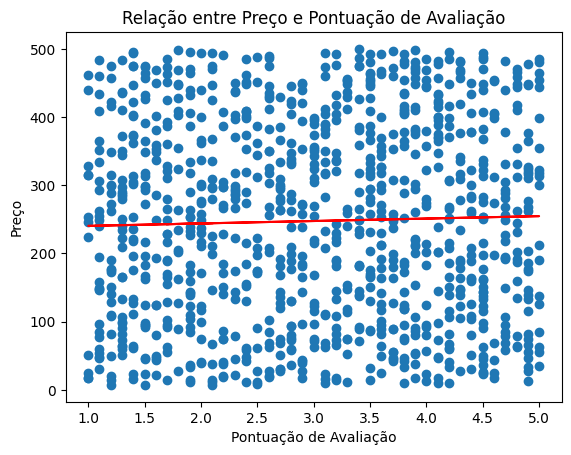

In [ ]:
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color = 'red')
plt.title('Relação entre Preço e Pontuação de Avaliação')
plt.xlabel('Pontuação de Avaliação')
plt.ylabel('Preço')
plt.show()

Avaliando se existe uma relação ente a categoria e o 'review_score', através da média.

In [158]:
groupby_categoria = df.groupby('category')
avg_review_score = groupby_categoria['review_score'].mean()
avg_review_score


category
Books             3.096753
Clothing          2.952143
Electronics       3.143478
Health            3.005036
Home & Kitchen    3.035200
Sports            3.091503
Toys              2.870861
Name: review_score, dtype: float64